In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import tensorflow as tf
import tensorflow.keras as keras
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [214]:
model = keras.models.load_model('./Forst_Arnett_Model.h5')

In [215]:
train = pd.read_csv("NN_Project.csv",index_col=0,  header=0)

In [216]:
month = []
for yearMonth in train.index.values:
    month.append(int(yearMonth.split("-")[1]))
train["MONTH"] = month

In [217]:
normalized_df = train.copy()

In [218]:
normalized_df.loc[len(normalized_df.index)] = ['0', '0', 15306163.16,'0','0','0'] 

In [219]:
normalized_df

,NUMBER_OF_ACCOUNTS,PLACEMENT_AMOUNT,PAYMENT_AMOUNT,REV,LETTERS_COUNT,MONTH
MONTH_YEAR,,,,,,
1990-06,1,275.63,20.00,255.63,1,6
1992-11,2,3203.2,10.00,3193.2,1,11
1993-02,1,613.28,70.00,543.28,3,2
1993-03,2,14850.0,10.00,14840.0,4,3
1993-04,1,2120.0,40.00,2080.0,2,4
...,...,...,...,...,...,...
2022-07,528187,124601.64,14006566.82,-13881965.18,472828,7
2022-08,560111,252556.19,18040112.62,-17787556.43,509834,8
2022-09,611340,317493.18,16795785.08,-16478291.9,428615,9


In [220]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(normalized_df)

In [221]:
normalized_df_tmp = normalized_df.to_numpy()

In [222]:
features = normalized_df_tmp
target = normalized_df_tmp[:,2]

In [223]:
window_length = 6
num_features = 6
train_generator = keras.preprocessing.sequence.TimeseriesGenerator(features,target,length=window_length,sampling_rate=1,batch_size=1)

In [224]:
x_test = train_generator[-7][0]

In [225]:
x_test

array([[[422959, 533903.58, 15708985.14, -15175081.56, 537624, 5],
        [514023, 362123.27, 15446204.32, -15084081.05, 434363, 6],
        [528187, 124601.64, 14006566.82, -13881965.18, 472828, 7],
        [560111, 252556.19, 18040112.62, -17787556.43, 509834, 8],
        [611340, 317493.18, 16795785.08, -16478291.9, 428615, 9],
        [478058, 412775.44, 16316381.66, -15903606.22, 501257, 10]]],
      dtype=object)

In [226]:
train_generator[-7][1]

array([15306163.16])

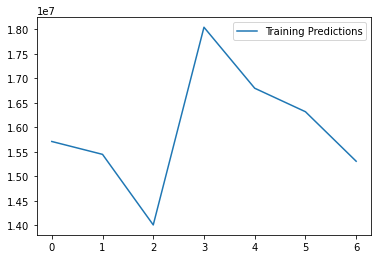

In [227]:
plt.plot(target[-7:])
plt.legend(['Training Predictions'])

In [228]:
normalized_df

,NUMBER_OF_ACCOUNTS,PLACEMENT_AMOUNT,PAYMENT_AMOUNT,REV,LETTERS_COUNT,MONTH
MONTH_YEAR,,,,,,
1990-06,1,275.63,20.00,255.63,1,6
1992-11,2,3203.2,10.00,3193.2,1,11
1993-02,1,613.28,70.00,543.28,3,2
1993-03,2,14850.0,10.00,14840.0,4,3
1993-04,1,2120.0,40.00,2080.0,2,4
...,...,...,...,...,...,...
2022-07,528187,124601.64,14006566.82,-13881965.18,472828,7
2022-08,560111,252556.19,18040112.62,-17787556.43,509834,8
2022-09,611340,317493.18,16795785.08,-16478291.9,428615,9


In [229]:
normalized_df = train.copy()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(normalized_df)
features = data_scaled
target = data_scaled[:,2]
window_length = 6
num_features = 6
train_generator = keras.preprocessing.sequence.TimeseriesGenerator(features,target,length=window_length,sampling_rate=1,batch_size=1)

In [230]:
x_test = train_generator[-7][0]
x_test

array([[[7.84820312e-01, 2.73759874e-03, 5.77383907e-01, 6.05537687e-02,
         4.81601268e-01, 2.72727273e-01],
        [6.79274918e-01, 3.91820404e-03, 6.06947237e-01, 5.62403619e-02,
         5.75761438e-01, 3.63636364e-01],
        [8.25524643e-01, 2.65734865e-03, 5.96795138e-01, 5.68898228e-02,
         4.65175206e-01, 4.54545455e-01],
        [8.48272174e-01, 9.13956592e-04, 5.41177142e-01, 6.54691953e-02,
         5.06368874e-01, 5.45454545e-01],
        [8.99542448e-01, 1.85313399e-03, 6.97006462e-01, 3.75954080e-02,
         5.46000043e-01, 6.36363636e-01],
        [9.81816751e-01, 2.32976693e-03, 6.48933941e-01, 4.69394890e-02,
         4.59019448e-01, 7.27272727e-01]]])

In [231]:
y_test = train_generator[-7][1]
y_test

array([0.63041299])

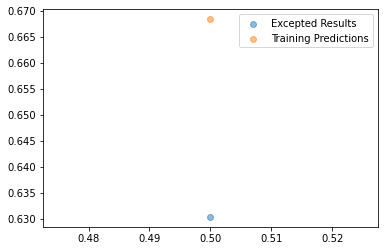

In [232]:
train_predictions = model.predict(x_test)
plt.scatter(.5, y_test, alpha=0.5)
plt.scatter(.5, train_predictions, alpha=0.5)
plt.legend(['Excepted Results', 'Training Predictions'])

In [239]:
expect = np.concatenate((x_test[0][:,2], y_test), axis=0)
predict = np.concatenate((x_test[0][:,2], train_predictions[0]), axis=0)

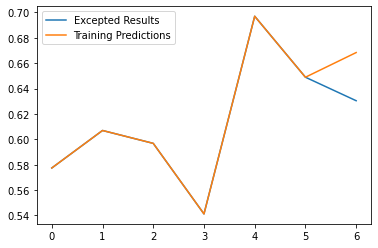

In [241]:
plt.plot(expect)
plt.plot(predict)
plt.legend(['Excepted Results', 'Training Predictions'])